## Zadanie 1

In [1]:
from sklearn.linear_model import Perceptron
import numpy as np
from matplotlib import pyplot as plt

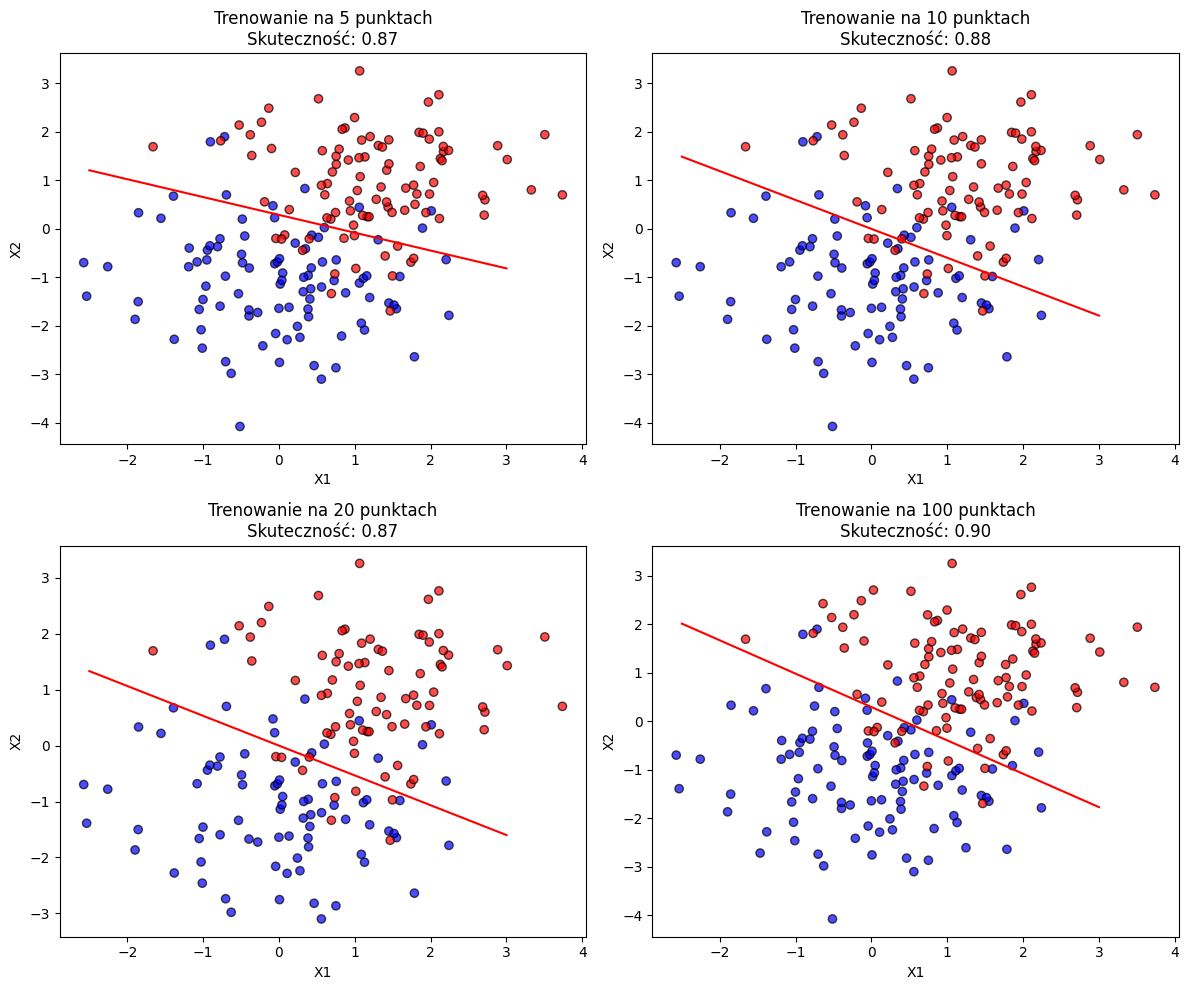

In [64]:
np.random.seed(44)
K1 = np.random.normal([0, -1], 1, [100, 2])
K2 = np.random.normal([1, 1], 1, [100, 2])
y1 = np.zeros(100)
y2 = np.ones(100)

K = np.concatenate([K1, K2], axis=0)
y = np.concatenate([y1, y2], axis=0)

train_sizes = [5, 10, 20, 100]

plt.figure(figsize=(12, 10))

for i, size in enumerate(train_sizes, 1):

    if size == 100:
        K_learn = np.concatenate([K1, K2], axis=0)
        y_learn = np.concatenate([y1, y2], axis=0)
        K_test = K_learn
        y_test = y_learn
    else:
        K_learn = np.concatenate([K1[:size], K2[:size]], axis=0)
        y_learn = np.concatenate([y1[:size], y2[:size]], axis=0)
        
        K_test = np.concatenate([K1[size:], K2[size:]], axis=0)
        y_test = np.concatenate([y1[size:], y2[size:]], axis=0)

    neuron = Perceptron(tol=1e-3, max_iter=20)
    neuron.fit(K_learn, y_learn)
    score = neuron.score(K_test, y_test)

    plt.subplot(2, 2, i)
    x1 = np.linspace(-2.5, 3, 100)
    x2 = -(neuron.coef_[0][0] * x1 + neuron.intercept_[0]) / neuron.coef_[0][1]
    
    plt.plot(x1, x2, '-r', label=f'Granica decyzji')
    plt.scatter(K_test[:, 0], K_test[:, 1], c=y_test, cmap='bwr', edgecolors='k', alpha=0.7)
    
    plt.title(f'Trenowanie na {size} punktach\nSkuteczność: {score:.2f}')
    plt.xlabel('X1')
    plt.ylabel('X2')

plt.tight_layout()
plt.show()

In [65]:
print(perceptron.n_iter_)

13


## Zadanie 2

In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix

In [66]:
try:
    data = pd.read_csv("fuel.txt", header=0, delimiter=",")
except Exception as e:
    print(f"Błąd podczas wczytywania pliku: {e}")
    exit()

data["purity_class"] = data["purity_class"].str.strip().map({"A": 0, "B": 1}).astype(int)

print(data.head())

        c_1    c_2      c_3  purity_class
0   645.795  0.151  155.570             1
1  1334.246  0.022  154.000             1
2  1102.023  0.122  155.495             1
3   316.575  0.070  152.951             1
4  -427.025  0.199  150.674             0


In [67]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std

print("Kształt X:", X.shape)
print("Kształt y:", y.shape)
print("Unikalne wartości w y:", np.unique(y))
print("Czy są NaN w X?", np.isnan(X).any())
print("Czy są NaN w y?", np.isnan(y).any())

Kształt X: (100, 3)
Kształt y: (100,)
Unikalne wartości w y: [0 1]
Czy są NaN w X? False
Czy są NaN w y? False


In [68]:
accuracies = []
perceptron = Perceptron(tol=1e-3, max_iter=20)

for i in range(5):
    perceptron.fit(X, y)
    y_pred = perceptron.predict(X)
    acc = accuracy_score(y, y_pred)
    accuracies.append(acc)
    
    print(f"Iteracja {i+1}: dokładność = {acc:.4f}")
    print("Macierz błędu:\n", confusion_matrix(y, y_pred), "\n")

Iteracja 1: dokładność = 0.9700
Macierz błędu:
 [[41  1]
 [ 2 56]] 

Iteracja 2: dokładność = 0.9700
Macierz błędu:
 [[41  1]
 [ 2 56]] 

Iteracja 3: dokładność = 0.9700
Macierz błędu:
 [[41  1]
 [ 2 56]] 

Iteracja 4: dokładność = 0.9700
Macierz błędu:
 [[41  1]
 [ 2 56]] 

Iteracja 5: dokładność = 0.9700
Macierz błędu:
 [[41  1]
 [ 2 56]] 



# Zadanie 3

In [15]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
data = load_iris()

print("Pierwsze 5 próbek danych (cechy):")
print(data.data[:5])
print()

print("Pierwsze 5 etykiet (klasy):")
print(data.target[:5])
print()

print("Wymiary cech X:", data.data.shape)
print("Wymiary etykiet y:", data.target.shape)

print("\nOpis zbioru danych:")
print("\n".join(data.DESCR.split("\n")[:15]))

Pierwsze 5 próbek danych (cechy):
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Pierwsze 5 etykiet (klasy):
[0 0 0 0 0]

Wymiary cech X: (150, 4)
Wymiary etykiet y: (150,)

Opis zbioru danych:
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:


In [61]:
data = load_iris()
X = data.data    # cechy
y = data.target  # etykiety

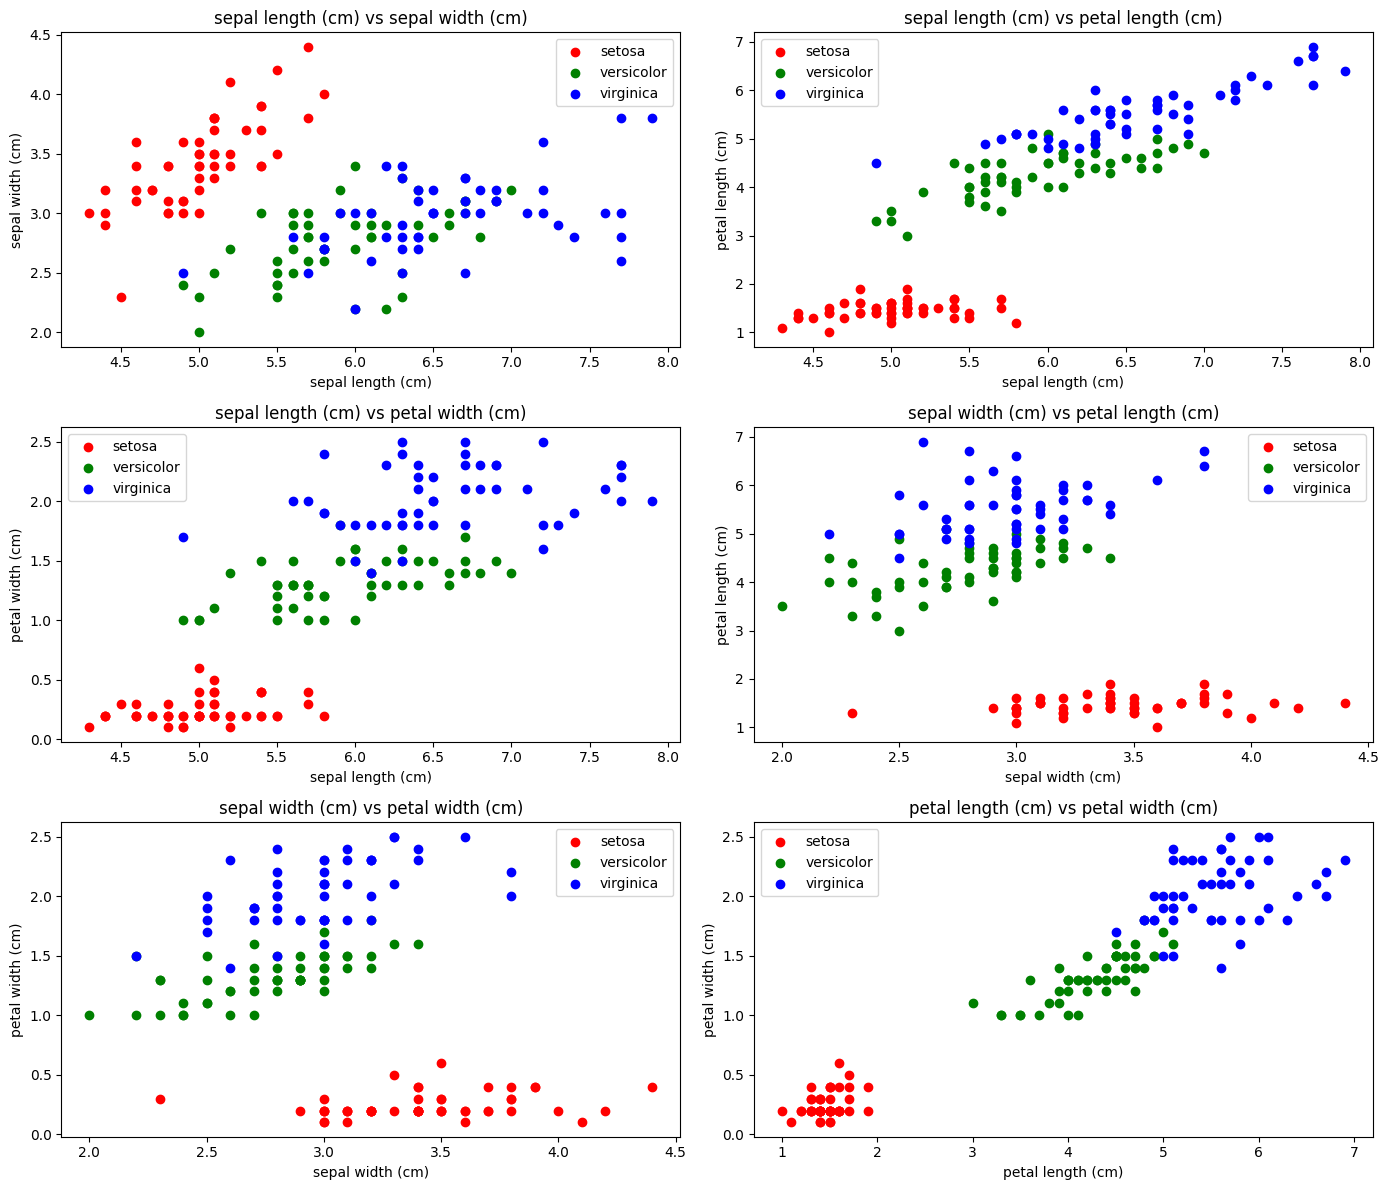

In [ ]:
colors = ['red', 'green', 'blue']

feature_combinations = [
    (0, 1),  # Sepal length vs Sepal width
    (0, 2),  # Sepal length vs Petal length
    (0, 3),  # Sepal length vs Petal width
    (1, 2),  # Sepal width vs Petal length
    (1, 3),  # Sepal width vs Petal width
    (2, 3),  # Petal length vs Petal width
]

fig, axes = plt.subplots(3, 2, figsize=(14, 12))

for idx, (i, j) in enumerate(feature_combinations):
    ax = axes[idx // 2, idx % 2]
    
    for k in range(3):  # 3 klasy
        ax.scatter(X[y == k, i], X[y == k, j], label=data.target_names[k], color=colors[k])
    
    ax.set_xlabel(data.feature_names[i])
    ax.set_ylabel(data.feature_names[j])
    ax.set_title(f'{data.feature_names[i]} vs {data.feature_names[j]}')
    ax.legend()

plt.tight_layout()
plt.show()

In [49]:
perceptron = Perceptron(max_iter=100, tol=1e-3)

accuracies = []
conf_matrices = []

for run in range(5):
    test_size = int(0.2 * len(X))
    indices = np.random.permutation(len(X))

    X_train = X[indices[:-test_size]]  # Cechy danych treningowych
    y_train = y[indices[:-test_size]]  # Etykiety danych treningowych
    X_test = X[indices[-test_size:]]   # Cechy danych testowych
    y_test = y[indices[-test_size:]]   # Etykiety danych testowych

    perceptron.fit(X_train, y_train)
    y_pred = perceptron.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrices.append(conf_matrix)
    
    print(f"Uruchomienie {run+1}: dokładność = {acc:.4f}; Macierz pomyłek:")
    print(f"{conf_matrix}\n")

print(f"Średnia dokładność po 5 uruchomieniach: {np.mean(accuracies):.4f}")

Uruchomienie 1: dokładność = 0.9333; Macierz pomyłek:
[[11  0  0]
 [ 0 11  0]
 [ 0  2  6]]

Uruchomienie 2: dokładność = 0.9333; Macierz pomyłek:
[[15  0  0]
 [ 0  8  1]
 [ 0  1  5]]

Uruchomienie 3: dokładność = 0.7000; Macierz pomyłek:
[[ 8  0  0]
 [ 7  3  0]
 [ 0  2 10]]

Uruchomienie 4: dokładność = 0.7667; Macierz pomyłek:
[[ 7  1  0]
 [ 0 10  0]
 [ 0  6  6]]

Uruchomienie 5: dokładność = 0.6667; Macierz pomyłek:
[[11  0  0]
 [ 5  0  5]
 [ 0  0  9]]

Średnia dokładność po 5 uruchomieniach: 0.8000


# Zadanie 4

In [ ]:
divisions = [0.8, 0.7, 0.6]  # 80/20, 70/30, 60/40
accuracies = {}

for ratio in divisions:
    test_size = int((1 - ratio) * len(X))
    indices = np.random.permutation(len(X))
    
    # Podział danych na treningowe i testowe
        # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-ratio, random_state=42)
    X_train, X_test = X[indices[:-test_size]], X[indices[-test_size:]]
    y_train, y_test = y[indices[:-test_size]], y[indices[-test_size:]]
    
    perceptron = Perceptron(max_iter=1000, tol=1e-3)
    perceptron.fit(X_train, y_train)
    y_pred = perceptron.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[ratio] = accuracy
    
    ratio_percentage = int(ratio * 100)
    print(f"Podział {ratio_percentage}%/{100-ratio_percentage}%: Dokładność = {accuracy:.4f}")

print(f"\nŚrednia dokładność dla różnych podziałów: {np.mean(list(accuracies.values())):.4f}")

Podział 80%/20%: Dokładność = 0.6207
Podział 70%/30%: Dokładność = 0.7111
Podział 60%/40%: Dokładność = 0.6500

Średnia dokładność dla różnych podziałów: 0.6606


# Zadanie 5

/home/fedora/.local/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/fedora/.local/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/fedora/.local/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/fedora/.local/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


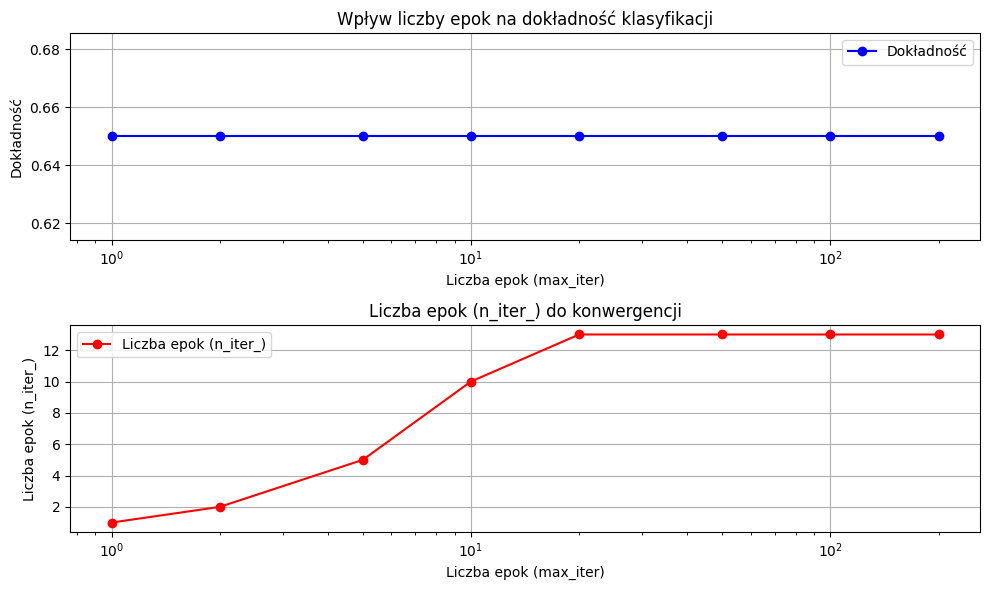


Liczba epok (max_iter) a dokładność:
1 epok: Dokładność = 0.6500, n_iter_ = 1
2 epok: Dokładność = 0.6500, n_iter_ = 2
5 epok: Dokładność = 0.6500, n_iter_ = 5
10 epok: Dokładność = 0.6500, n_iter_ = 10
20 epok: Dokładność = 0.6500, n_iter_ = 13
50 epok: Dokładność = 0.6500, n_iter_ = 13
100 epok: Dokładność = 0.6500, n_iter_ = 13
200 epok: Dokładność = 0.6500, n_iter_ = 13


In [62]:
epochs = [1, 2, 5, 10, 20, 50, 100, 200]
accuracies = []
n_iter_values = []

for max_iter in epochs:
    X_train, X_test = X[indices[:-test_size]], X[indices[-test_size:]]
    y_train, y_test = y[indices[:-test_size]], y[indices[-test_size:]]

    perceptron = Perceptron(max_iter=max_iter, tol=1e-6, random_state=42, early_stopping=False)
    perceptron.fit(X_train, y_train)
    
    y_pred = perceptron.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    n_iter_values.append(perceptron.n_iter_)

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(epochs, accuracies, marker='o', color='b', label="Dokładność")
plt.xscale("log")
plt.xlabel("Liczba epok (max_iter)")
plt.ylabel("Dokładność")
plt.title("Wpływ liczby epok na dokładność klasyfikacji")
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, n_iter_values, marker='o', color='r', label="Liczba epok (n_iter_)")
plt.xscale("log")
plt.xlabel("Liczba epok (max_iter)")
plt.ylabel("Liczba epok (n_iter_)")
plt.title("Liczba epok (n_iter_) do konwergencji")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

print("\nLiczba epok (max_iter) a dokładność:")
for i, max_iter in enumerate(epochs):
    print(f"{max_iter} epok: Dokładność = {accuracies[i]:.4f}, n_iter_ = {n_iter_values[i]}")